# Day 4 - Data Science Essentials Program

**Agenda:**
- Model selection
- Cross validation
- CV with groups

**Before we get started:**
- open the `ModelSelection.ipynb` file
- import the packages at the top of the file
- can also open up presentation to slide 84

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (KFold, StratifiedKFold, GroupKFold)

In [4]:
df = pd.read_csv("ExData\car_data.csv", index_col=['User ID'])
df = pd.concat([df, pd.get_dummies(df['Gender'], dtype=int)], axis=1)

## Cross Validation Scores
- `cross_val_score(model, X, y, cv=number of tests, scoring=metric)`
    - if model is a classifier, by default it will do a StratifiedKFold --> will maintain proportions of yes/no or 1/0
    - default "scoring metric" for classifiers is "accuracy" (but can change to precision, or recall or something else)
    - https://scikit-learn.org/stable/modules/model_evaluation.html

In [13]:
clf = tree.DecisionTreeClassifier(random_state=42)
X = df[['AnnualSalary','Age']]
y = df['Purchased']
scores = cross_val_score(clf, X, y, cv=5)
scores, scores.mean(), scores.std(), scores.min() #accuracy scores of the 5 tests after it was trained 5 times

(array([0.845, 0.855, 0.89 , 0.855, 0.845]),
 0.858,
 0.016613247725836167,
 0.845)

In [11]:
scores = cross_val_score(clf, X, y, cv=5, scoring='precision') #precision, recall, f1, 
scores

array([0.76923077, 0.82278481, 0.8625    , 0.83333333, 0.82894737])

In [14]:
X2 = df[['AnnualSalary']]
scores = cross_val_score(clf, X2, y, cv=5)
scores, scores.mean(), scores.std(), scores.min()

(array([0.71 , 0.735, 0.725, 0.775, 0.75 ]), 0.739, 0.022226110770892885, 0.71)

# Train/Test Split the Data
- before running the cross validation score, split your data first into train/test
- run the cross_val_score on JUST the TRAIN data for diff permutations of X variables and models
- pick the best model based off the cross val scores, then re-train with ALL train data
- then do a final test with TEST data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'AnnualSalary', 'Female']], df['Purchased'], test_size=0.2, random_state=0)

In [19]:
scores = cross_val_score(clf, X_train[['Age','AnnualSalary']], y_train, cv=5, scoring='accuracy')
scores, scores.mean(), scores.std(), scores.min()

(array([0.80625, 0.90625, 0.85625, 0.85   , 0.84375]),
 0.8524999999999998,
 0.03201562118716424,
 0.80625)

In [20]:
scores = cross_val_score(clf, X_train[['Age']], y_train, cv=5, scoring='accuracy')
scores, scores.mean(), scores.std(), scores.min()

(array([0.8    , 0.85   , 0.76875, 0.83125, 0.8375 ]),
 0.8175000000000001,
 0.029421505739849533,
 0.76875)

In [21]:
scores = cross_val_score(clf, X_train[['AnnualSalary']], y_train, cv=5, scoring='accuracy')
scores, scores.mean(), scores.std(), scores.min()

(array([0.70625, 0.71875, 0.70625, 0.73125, 0.7125 ]),
 0.715,
 0.00935414346693482,
 0.70625)

In [22]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
scores, scores.mean(), scores.std(), scores.min()

(array([0.80625, 0.91875, 0.88125, 0.85625, 0.85   ]),
 0.8625,
 0.03708099243547829,
 0.80625)

**Pick the best model and re-train with all data**

In [24]:
clf.fit(X_train[['Age','AnnualSalary']], y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
clf.score(X_train[['Age','AnnualSalary']], y_train)

0.9925

In [27]:
clf.score(X_test[['Age','AnnualSalary']], y_test)

0.905

## Coffee break until 10:40am
- notes so far in the chat
- in the ModelSelection notebook covered up to "Different Folds"

Steps:
1) create a variable to keep track of how you're cutting the data
2) in the cross_val_score write cv=variable 

In [70]:
cvCut = StratifiedKFold(n_splits=5)

In [71]:
scores = cross_val_score(clf, X_train[['Age','AnnualSalary']], y_train, cv=cvCut, scoring='accuracy')
scores, scores.mean(), scores.std(), scores.min()

(array([0.80625, 0.90625, 0.85625, 0.85   , 0.84375]),
 0.8524999999999998,
 0.03201562118716424,
 0.80625)

### Below are codes to pull out the rows from the cuts to see the proportions

In [68]:
cvCut = StratifiedKFold(n_splits=2)

In [69]:
train, test = cvCut.split(df[['Age']],df['Purchased'])

In [44]:
table1 = df.iloc[train[0]]
table2 = df.iloc[train[1]]

In [57]:
# table2

In [47]:
table1['Purchased'].value_counts()

Purchased
0    299
1    201
Name: count, dtype: int64

In [48]:
table2['Purchased'].value_counts()

Purchased
0    299
1    201
Name: count, dtype: int64

In [51]:
df['Purchased'].value_counts()

Purchased
0    598
1    402
Name: count, dtype: int64

In [52]:
299/500, 598/1000

(0.598, 0.598)

## Group K Fold
- we're going to create some "groups" of ages in our data set and test the models on those groups
- each train/test split will ommit one of the groups

In [73]:
np.linspace(18,63,6)

array([18., 27., 36., 45., 54., 63.])

In [74]:
df['AgeGroup'] = 0
df.loc[(df['Age'] >= 18) & (df['Age'] <=26), 'AgeGroup'] = 1
df.loc[(df['Age'] >= 27) & (df['Age'] <=35), 'AgeGroup'] = 2
df.loc[(df['Age'] >= 36) & (df['Age'] <=44), 'AgeGroup'] = 3
df.loc[(df['Age'] >= 45) & (df['Age'] <=53), 'AgeGroup'] = 4
df.loc[(df['Age'] >= 54) & (df['Age'] <=62), 'AgeGroup'] = 5
df.loc[(df['Age'] >= 63), 'AgeGroup'] = 6

# df.head(10)

In [75]:
df['AgeGroup'].value_counts()

AgeGroup
3    340
4    213
2    210
5    116
1    114
6      7
Name: count, dtype: int64

In [78]:
df.groupby(['AgeGroup'])[['Age','AnnualSalary']].agg(['min','max','mean','count'])

Age                      AnnualSalary                            
         min max       mean count          min     max          mean count
AgeGroup                                                                  
1         18  26  22.692982   114        15000  118000  55767.543860   114
2         27  35  30.985714   210        15000  151500  69254.761905   210
3         36  44  39.655882   340        21500  150500  77164.705882   340
4         45  53  48.657277   213        20000  151500  73244.131455   213
5         54  62  57.965517   116        23000  152500  81693.965517   116
6         63  63  63.000000     7        36500  110500  67785.714286     7

<Axes: xlabel='AgeGroup', ylabel='AnnualSalary'>

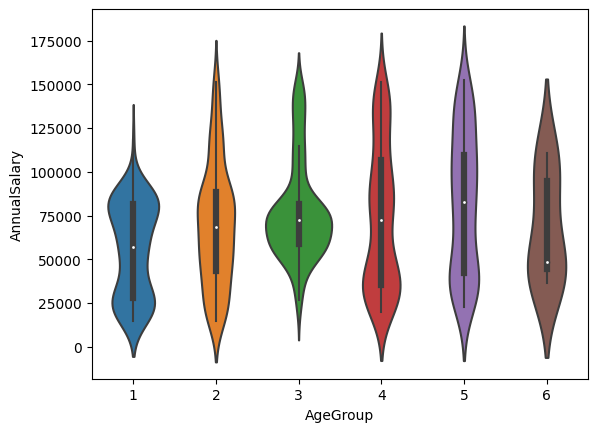

In [79]:
sns.violinplot(data=df, x='AgeGroup', y='AnnualSalary')

<Axes: xlabel='AgeGroup', ylabel='AnnualSalary'>

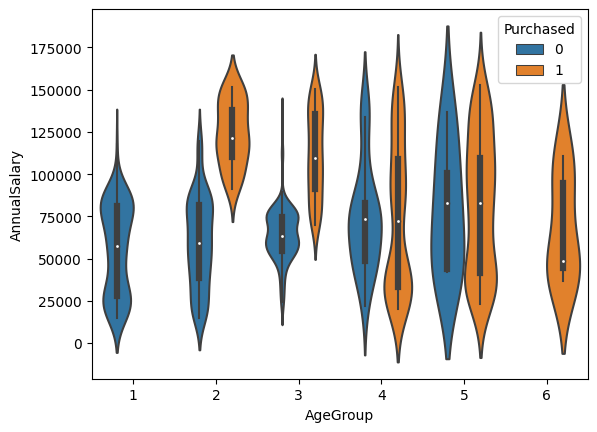

In [80]:
sns.violinplot(data=df, x='AgeGroup', y='AnnualSalary',hue='Purchased')

In [82]:
cv = GroupKFold(n_splits=6)  # Must me less than or equal to number of groups
cv.split(df[['AnnualSalary', 'Female']], df['Purchased'], groups=df['AgeGroup'])

<generator object _BaseKFold.split at 0x0000026B41F18EB0>

In [87]:
predictCols = [1, 2, 4]  #cols 1, 2, 4 = Age, AnnualSalary, Female
# predictCols = [2, 4] #try running with Age removed
targetCol = [3] #col 3 = Purchased
scores = [] #to keep the scores of all trained models

for train_index, test_index in cv.split(df[['AnnualSalary', 'Female']], df['Purchased'], groups=df['AgeGroup']):
    print("Hold-out group:",df.iloc[test_index, -1].unique()) #print out which test group was hold out
    
    clf.fit(df.iloc[train_index, predictCols], df.iloc[train_index, targetCol])
    score = clf.score(df.iloc[test_index, predictCols], df.iloc[test_index, targetCol])
    scores.append(score)
    print("Score:",score)
    print(classification_report(df.iloc[test_index, targetCol], clf.predict(df.iloc[test_index, predictCols])))
    print("-" * 100)

Hold-out group: [3]
Score: 0.8529411764705882
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       248
           1       0.76      0.66      0.71        92

    accuracy                           0.85       340
   macro avg       0.82      0.79      0.81       340
weighted avg       0.85      0.85      0.85       340

----------------------------------------------------------------------------------------------------
Hold-out group: [4]
Score: 0.6056338028169014
              precision    recall  f1-score   support

           0       0.33      0.68      0.45        50
           1       0.86      0.58      0.69       163

    accuracy                           0.61       213
   macro avg       0.59      0.63      0.57       213
weighted avg       0.73      0.61      0.64       213

----------------------------------------------------------------------------------------------------
Hold-out group: [2]
Score: 0.8952380952380953
      

## Working Session until 11:40am
- ModelSelectionAssignment

## Wraup-UP
- https://www.surveymonkey.com/r/VFQYMNL
- github: https://github.com/TheMarqueeGroup/JPM_DS_Oct2023
    - all answer keys will be on here
    - will also send a consolidated zip file
    - github will stay up for 2 more weeks
- extra resources:
    - https://scikit-learn.org/stable/index.html
    - https://bogdan.streamlit.app/

### Takeup

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
df['AnnualSalaryStd'] = StandardScaler().fit_transform(df['AnnualSalary'].values.reshape(-1,1))

In [91]:
clf_Log = LogisticRegression(random_state=42)
clf_DT = tree.DecisionTreeClassifier(random_state=42)

Xcols = ['Age','AnnualSalary','AnnualSalaryStd','Female','AgeGroup']
#initial split of data
X_train, X_test, y_train, y_test = train_test_split(df[Xcols], df['Purchased'], test_size=0.2, random_state=0)

### Comparison between Stratified KFold Decision Tree and Logistic Regression

In [92]:
cols_Log = ['Age','AnnualSalaryStd']
cols_DT = ['Age','AnnualSalary']
scores_Log = cross_val_score(clf_Log, X_train[cols_Log], y_train, cv=5)
scores_DT = cross_val_score(clf_DT, X_train[cols_DT], y_train, cv=5)

In [97]:
info = {'Logistic':{'Scores':scores_Log,'Mean':scores_Log.mean(),'STD':scores_Log.std(),'Min':scores_Log.min()},
        'DT':{'Scores':scores_DT,'Mean':scores_DT.mean(),'STD':scores_DT.std(),'Min':scores_DT.min()}}
info_table = pd.DataFrame(info)
info_table.T

,Scores,Mean,STD,Min
Logistic,"[0.8125, 0.83125, 0.79375, 0.84375, 0.79375]",0.815,0.02,0.79375
DT,"[0.80625, 0.90625, 0.85625, 0.85, 0.84375]",0.8525,0.032016,0.80625


In [105]:
clf_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [107]:
clf_DT.score(X_test,y_test)

0.905